In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Read the file
file_to_read="Resources/data/listings.csv.gz"
data_df=pd.read_csv(file_to_read)
print(data_df.shape)
data_df.head()

(15171, 74)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20220605131750,2022-06-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.08
1,8077,https://www.airbnb.com/rooms/8077,20220605131750,2022-06-05,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.08
2,27423,https://www.airbnb.com/rooms/27423,20220605131750,2022-06-05,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,118124,https://www.airbnb.com/users/show/118124,...,5.00,4.82,4.82,NaN,f,1,1,0,0,0.18
3,30931,https://www.airbnb.com/rooms/30931,20220605131750,2022-06-05,Downtown Toronto - Waterview Condo,Split level waterfront condo with a breathtaki...,NaN,https://a0.muscache.com/pictures/227971/e8ebd7...,22795,https://www.airbnb.com/users/show/22795,...,NaN,NaN,NaN,NaN,f,2,1,1,0,0.01
4,40456,https://www.airbnb.com/rooms/40456,20220605131750,2022-06-05,Downtown- King Size Bed and Parking,---------------------Renovated and Newly Furn...,This is Nice Neighborhood located in Downtown ...,https://a0.muscache.com/pictures/b36b6ae3-20aa...,174063,https://www.airbnb.com/users/show/174063,...,4.96,4.57,4.68,NaN,f,4,4,0,0,0.79


## Data Cleansing and Transformation

In [2]:
#Check the columns in the dataset
data_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

#### Dropping Columns

The aim of this project is to predict AirBnB prices. Natural Language Processing will not be used in the creation of this model. Therefore, columns that are not useful for predicting prices will be dropped.

In [3]:
cols_to_drop=['listing_url', 'scrape_id', 'last_scraped', 'description', 'neighborhood_overview','picture_url','host_id',
              'host_url','host_name', 'host_location','host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
              'host_verifications', 'bathrooms_text', 'host_acceptance_rate', 'neighbourhood_group_cleansed','minimum_minimum_nights',
              'maximum_minimum_nights', 'minimum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
              'calendar_last_scraped', 'license','calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
              'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms','host_has_profile_pic',
              'maximum_nights_avg_ntm', 'has_availability', 'number_of_reviews_l30d','host_total_listings_count','neighbourhood','calendar_updated','reviews_per_month']
             
    
data_df=data_df.drop(cols_to_drop, axis=1)
data_df.head()

,id,name,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,1419,Beautiful home in amazing area!,2008-08-08,NaN,NaN,f,1.0,t,Little Portugal,43.64590,...,2015-07-19,2017-12-04,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f
1,8077,Downtown Harbourfront Private Room,2009-06-22,NaN,NaN,f,2.0,f,Waterfront Communities-The Island,43.64080,...,2009-08-20,2013-08-27,4.84,4.81,4.89,4.87,4.90,4.92,4.83,t
2,27423,Executive Studio Unit- Ideal for One Person,2010-05-04,within a few hours,100%,f,1.0,t,South Riverdale,43.66884,...,2010-06-07,2011-08-30,4.92,5.00,4.82,5.00,5.00,4.82,4.82,f
3,30931,Downtown Toronto - Waterview Condo,2009-06-22,NaN,NaN,f,2.0,f,Waterfront Communities-The Island,43.64015,...,2010-08-11,2010-08-11,5.00,NaN,NaN,NaN,NaN,NaN,NaN,f
4,40456,Downtown- King Size Bed and Parking,2010-07-20,within an hour,100%,t,3.0,t,South Parkdale,43.63539,...,2010-08-03,2022-01-29,4.63,4.64,4.66,4.95,4.96,4.57,4.68,f


In [4]:
# Check for null values
data_df.isnull().sum()

id                                 0
name                               2
host_since                         3
host_response_time              4720
host_response_rate              4720
host_is_superhost                  3
host_listings_count                3
host_identity_verified             3
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                      15171
bedrooms                        1042
beds                             245
amenities                          0
price                              0
minimum_nights                     0
maximum_nights                     0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
number_of_reviews_ltm              0
f

#### Checking and Cleaning individual columns

#### host_since

In [5]:
#Convert object to datetime
data_df["host_since"]=pd.to_datetime(data_df["host_since"])

#Calculate the number of days
data_df["host_active_days"]=(pd.datetime(2022,6, 6)-data_df["host_since"]).astype('timedelta64[D]')

#Calculate the mean and median
print(round(data_df["host_active_days"].mean(),2))
print(data_df["host_active_days"].median())

# Fill the null values with median values
data_df["host_active_days"].fillna(data_df["host_active_days"].median(), inplace=True)

2083.97
2134.0


C:\Users\carol\.conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


#### host_response_time

In [6]:
print("Null Values:", data_df["host_response_time"].isnull().sum())
print("Proportion:", round(data_df["host_response_time"].isna().sum()/len(data_df)*100,1))

#Replace null values with "unknown"
data_df["host_response_time"].fillna("unknown", inplace=True)
data_df["host_response_time"].value_counts()

Null Values: 4720
Proportion: 31.1


within an hour        6393
unknown               4720
within a few hours    2051
within a day          1431
a few days or more     576
Name: host_response_time, dtype: int64

#### host_response_rate

In [7]:
#Convert the column datatype to float
data_df.host_response_rate = data_df.host_response_rate.str[:-1].astype('float64')

response_rate=data_df["host_response_rate"].values
response_rate.dtype

#Bin the values into four categories
bins=[0, 50, 90,99, 100]
group_names=["0-49%", "50-89%", "90-99%", "100%"]
data_df["host_response_rate_new"]=pd.cut(response_rate, bins, labels=group_names, include_lowest=True)

# Convert column to string
data_df["host_response_rate_new"]= data_df["host_response_rate_new"].astype('str')

#Replace null values with "unknown"
data_df["host_response_rate_new"].replace("nan", "unknown", inplace=True)

#Drop the original column
data_df.drop("host_response_rate", axis=1,inplace=True)

#Check the value counts
data_df["host_response_rate_new"].value_counts()


100%       6995
unknown    4720
50-89%     1471
90-99%     1299
0-49%       686
Name: host_response_rate_new, dtype: int64

#### property_types

In [8]:
#Replacing and grouping multiple categories into main heads

data_df["property_type"].replace({
    "Entire home": "House",
    "Private room in rental unit": "One Room",
    "Entire rental unit": "Apartment",
    "Entire condo" : "Apartment",
    "Private room in home": "One Room",
    "Private room in condo": "One Room",
    "Shared room in parking space": "Shared Room",
    "Entire guest suite": "Apartment",
    "Entire townhouse": "House",
    "Private room in bed and breakfast": "One Room",
    "Private room in townhouse": "One Room",
    "Private room in tiny home": "One Room",
    "Private room in guest suite": "One Room",
    "Private room in loft": "One Room",
    "Private room in cottage" : "One Room",
    "Private room in bungalow": "One Room",
    "Private room in guesthouse": "One Room",
    "Private room": "One Room",
    "Private room in vacation home": "One Room",
    "Private room in floor": "One Room",
    "Private room in villa": "One Room",
    "Room in hostel": "One Room",
    "Private room in castle": "One Room",
    "Room in hotel": "One Room",
    "Private room in barn": "One Room",
    "Room in boutique hotel": "One Room",
    "Room in bed and breakfast": "One Room",
    "Private room in serviced apartment": "One Room",
    "Private room in casa particular": "One Room",
    "Private room in earthen home" : "One Room",
    "Room in aparthotel": "One Room",
    "Private room in hut": "One Room",
    "Private room in hostel": "One Room",
    "Private room in holiday park": "One Room",
    "Shared room in rental unit" : "Shared Room",
    "Shared room in home": "Shared Room",
    "Shared room in condo": "Shared Room",
    "Shared room in townhouse": "Shared Room",
    "Shared room in bed and breakfast": "Shared Room",
    "Shared room in bungalow": "Shared Room",
    "Shared room in hostel": "Shared Room",
    "Shared room in loft": "Shared Room",
    "Shared room in guesthouse": "Shared Room",
    "Shared room in villa": "Shared Room",
    "Shared room in barn": "Shared Room",
    "Shared room in boat": "Shared Room",
    "Shared room in hotel": "Shared Room",
    "Shared room in guest suite": "Shared Room",
    "Entire bungalow": "House",
    "Tiny home": "House",
    "Entire villa": "House",
    "Entire place": "House",
    "Entire cottage": "House",
    "Earthen home": "House",
    "Entire vacation home": "House",
    "Entire serviced apartment": "Apartment",
    "Entire loft": "Apartment",
    "Entire guesthouse": "House",
    "Entire home/apt": "House"},inplace=True)

#Replacing other categories with 'other'
data_df.loc[~data_df["property_type"].isin(["House", "Apartment", "One Room", "Shared Room"]), "property_type"]="Other"
    
# Check the property type value count
data_df["property_type"].value_counts()

Apartment      7885
One Room       4700
House          2443
Shared Room     131
Other            12
Name: property_type, dtype: int64

#### bathrooms, bedrooms and beds

In [9]:
#Drop the bathroom column since no data is available
data_df=data_df.drop("bathrooms", axis=1)


In [10]:
# Replace missing values with median
for col in ["bedrooms", "beds"]:
    data_df[col].fillna(data_df[col].median(), inplace=True)

### amenities

In [11]:
data_df["amenities"].unique()

array(['["Smoke alarm", "Dryer", "Washer", "Air conditioning", "TV", "Heating", "Essentials", "Indoor fireplace", "Shampoo", "First aid kit", "Fire extinguisher", "Wifi", "Long term stays allowed", "Kitchen"]',
       '["Pool", "Smoke alarm", "Free parking on premises", "TV with standard cable", "Gym", "Air conditioning", "Heating", "Cable TV", "Elevator", "Shampoo", "Wifi", "Long term stays allowed"]',
       '["Central heating", "Barbecue utensils", "Dryer", "Toaster", "Wifi", "32\\" HDTV", "Refrigerator", "Carbon monoxide alarm", "Oven", "Outdoor furniture", "Paid parking on premises", "Long term stays allowed", "Microwave", "Hot water", "Dishes and silverware", "Private entrance", "Iron", "Central air conditioning", "Shared patio or balcony", "Free washer \\u2013 In unit", "Hot water kettle", "Dining table", "Fire extinguisher", "Kitchen", "Cooking basics", "BBQ grill", "Hair dryer", "Drying rack for clothing", "Smoke alarm", "Shared fenced garden or backyard", "Outdoor dining area

In [12]:
#Creating a set of amenities
amenities_list = list(data_df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)


In [13]:
#Grouping the amenities into separate columns with 1 if amenities present and 0 if not present
data_df.loc[data_df['amenities'].str.contains('shampoo|body soap|One Man Jack body soap|Kirkland Bodywash body soap|Different types shampoo|Several hotel brands body soap|V05 shampoo|Head & shoulders  conditioner|Several Hotel Brands Available body soap|Shampoo|dove  body soap|Pantene or Herbal Essences shampoo|Alaffia EveryDay Shea Conditioner Lavender conditioner|Herbal Essence Body Wash body soap|Pert shampoo|Le Labo conditioner|Natural bar soaps will be provided  body soap|L\'oreal shampoo|Loreal body soap|Basic  body soap|Premium  body soap|Pantene  shampoo|L\'Or\\u00e9al conditioner|Salon brands shampoo|Truly Earth body soap|Coconut conditioner|L\\u2019Or\\u00e9al  body soap|TRESEMME conditioner|Body wash body soap|Yves Rocher shampoo|Adidas conditioner|Aveena conditioner|L\'Oreal  body soap|Olay body soap|Canadian shampoo|Pantene Pro V conditioner|Generic body soap|Myriade d\\u2019arabe shampoo|Basic shampoo|Sukin body soap|TRESemm\\u00e9 shampoo|Name brand  body soap|Dove conditioner conditioner|Ivory bar soap body soap|Tresemme conditioner|Boo Bamboo Conditioner conditioner|Coconut shampoo|Body lotion and soap body soap|Dove bar soap  body soap|Eco Botanics  conditioner|Best available neutral body wash body soap|Head & Shoulders shampoo|Softsoap  body soap|Head&shoulder shampoo|Irish Fresh body soap|Alaffia body soap|Dr Bronners  body soap|Pears body soap|Various brands  shampoo|Regular  shampoo|Everyone shampoo|Numerous  body soap|Dove - Natural  body soap|Plushresidence brand body soap|North American Hemp Co. - natural product body soap|Argan Oil conditioner|we will arrange for it body soap|Hypoallergenic body soap|Soft body soap|Head and Shoulder shampoo|Essenes  body soap|Pantene 2-in-1 conditioner|Ivory Bar Soap body soap|Kirkland/ivory or similar body soap|Head & Shoulders conditioner|Pantene Daily Moisture Renewal shampoo|Ivory clean body soap|LUSH body soap|H&S shampoo|Natural conditioner|Head And Shoulder|Different  shampoo|Lavender soap from bulk barn body soap|Truly Earth shampoo|Pantene or similar conditioner|Nivea & Dove body soap|Toiletries|Head&Shoulder shampoo|Eco Botanics  body soap|Dr. Bronner\\u2019s body soap|Body Wash body soap|Noname conditioner|KIRKLAND shampoo|organic hypo-allergenic body soap|Organic conditioner|Liveclean shampoo|Iris Spring body soap|Dove  shampoo|Various conditioner|Variety brands body soap|Various brands  conditioner|TRESemm\\u00e9 conditioner|Alaffia - natural product conditioner|Johnsons & Johnson conditioner|Hotel Brands Available shampoo|General body soap|Moroccan oil conditioner|Natural shampoo|No name body soap|Luxury shampoo|Old Spice ?  body soap|Several hotel brands  conditioner|American  body soap|Assorted Quality Brands  shampoo|H\\u00f4tel-time shampoo|No name  body soap|Prosilk  shampoo|Known brands shampoo|IVORY clean body soap|Iris spring  body soap|Herbal Essence shampoo|Tre semme conditioner|SOS and lemon dish soap conditioner|Marc Antony conditioner|ProSilk body soap|Garnier Fructis shampoo|Aveeno body soap'),"toiletries"]=1
data_df.loc[data_df['amenities'].str.contains('Game console|Philip sound system with Bluetooth and aux|Record player|TV|TV with standard cable|Cable TV|39\\ TV|Beats Speaker sound system with Bluetooth and aux|JBL Bluetooth sound system|40\\ HDTV with Netflix|55\\ TV with Amazon Prime Video|90\\ TV with Apple TV|44\\ HDTV with Roku|43\\ TV|32\\ TV with Chromecast|Game console: Nintendo Wii and Xbox One|Alexa sound system with Bluetooth and aux|43\\ TV|36\\ HDTV|57\\ HDTV with Netflix|46\\ HDTV with Roku|68\\ HDTV with Netflix|46\\ HDTV with standard cable|46\\ TV with Chromecast|Radio and CD player sound system|Savant sound system|Radio and CD player sound system|24\\ TV with Chromecast|Sony  sound system with aux|Sonos\\u2122 Bluetooth sound system|55\\ TV with Chromecast|Google Smart Speaker Bluetooth sound system|Roku Bluetooth sound system|HDTV with standard cable|52\\ HDTV|Bluetooth speaker Bluetooth sound system|Denon sound system|54\\ HDTV with Apple TV|Chromecast|37\\ HDTV with Amazon Prime Video|Samsung Sound Bar sound system with Bluetooth and aux|26\\ HDTV with standard cable|Denon - connect via wifi sound system|42\\ HDTV with Netflix|78\\ HDTV with Netflix|37\\ TV with Netflix|75\\ HDTV|Alexa sound system|Samsung Bluetooth Speaker  Bluetooth sound system|43\\ HDTV with Amazon Prime Video|60\\ TV with standard cable|47\\ TV with Roku|Sonos 5 & 1 Bluetooth sound system|49\\ HDTV with Netflix|Netflix|43\\ HDTV with Amazon Prime Video|43\\ HDTV with standard cable|50\\ HDTV with HBO Max|Bose Boom Box Bluetooth sound system|30\\ HDTV with Netflix|46\\ HDTV|48\\ HDTV with Chromecast|Sonos or Old School Turntable sound system with Bluetooth and aux|52\\ HDTV with premium cable|48\\ HDTV with Roku|50\\ HDTV with Netflix|Game console: PS4|60\\ HDTV with standard cable|Wonderboom Bluetooth sound system|Bose sound touch Bluetooth sound system|Wireless speakers available - compatible with all electronic devices sound system|55\\ TV with Netflix|48\\ TV with standard cable|TV with Apple TV|43\\ TV with Roku|54\\ HDTV with Apple TV|Alexa - Amazon  sound system|42\\ HDTV with Roku|65\\ HDTV with Amazon Prime Video|52\\ TV|32\\ HDTV|SONOS Bluetooth sound system|40\\ HDTV with Roku|58\\ HDTV with Apple TV|Samsung Soundbar Bluetooth sound system|37\\ HDTV with|50\\ HDTV with Roku|82\\ HDTV with Netflix|85\\ HDTV|85\\ HDTV with Amazon Prime Video|37\\ HDTV with Netflix|42\\ TV with Amazon Prime Video|32\\ TV with premium cable|Marshall Bluetooth sound system|45\\ HDTV with|46\\ HDTV with Netflix|42\\ HDTV with Netflix|TV with HBO Max|65\\ TV with Amazon Prime Video|Bose Bluetooth  Bluetooth sound system|Eneby Bluetooth sound system|LG Soundbar and Sub sound system|55\\ HDTV with Amazon Prime Video|47\\ TV with Netflix|48\\ TV|32\\ TV with Apple TV|58\\ HDTV|Polaroid sound system with Bluetooth and aux|40\\ HDTV with premium cable|70\\ HDTV with Apple TV|42\\ HDTV|48\\ HDTV with Apple TV|18\\ TV with Netflix|43\\ TV with Chromecast|Sound system|55\\ TV with standard cable|46\\ HDTV with Amazon Prime Video|38\\ TV|Google Home sound system|45\\ HDTV with Roku|30\\ HDTV|54\\ HDTV with Netflix|65\\ HDTV|55\\ HDTV with premium cable|40\\ HDTV with Chromecast|36\\ HDTV|37\\ TV with Netflix|65\\ TV with Apple TV|65\\ HDTV with premium cable|78\\ HDTV with Netflix|70\\ HDTV with Netflix|Sony 7.2 Surround Sound sound system with Bluetooth and aux|50\\ TV with Amazon Prime Video|Bose Mini Bluetooth sound system|45\\ HDTV|90\\ TV with Apple TV|Chromecast|65\\ HDTV with Apple TV|49\\ TV with Apple TV|Sony sound system|70\\ HDTV with Chromecast|52\\ TV with|33\\ HDTV with Chromecast|30\\ HDTV with Amazon Prime Video|46\\ HDTV with Amazon Prime Video|45\\ TV with Amazon Prime Video'), 'high_end_electronics'] = 1
data_df.loc[data_df['amenities'].str.contains('Air conditioning|Window AC unit|Central air conditioning|Heating|Indoor Fireplace|Central Heating|Central air conditioning|Central heating'), 'ac_heater'] = 1
data_df.loc[data_df['amenities'].str.contains('Internet|Pocket wifi|Wifi|wifi'), 'internet'] = 1
data_df.loc[data_df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque|Barbecue utensils'), 'bbq'] = 1
data_df.loc[data_df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
data_df.loc[data_df['amenities'].str.contains('Freezer|Hot water kettle|Microwave|Fridge|Toaster Oven|Samsung  stainless steel stove|Paid dryer|GE stainless steel oven|Samsung refrigerator|LG - Stainless Steel refrigerator|G.E.  stainless steel gas stove|Induction stove|GE Self Clean stainless steel oven|Brevettie  oven|Hair dryer|Hot plates  electric stove|Black & Decker stainless steel oven|Smsub oven|FRIGIDAIRE refrigerator|Dryer|Hangers|stove|Dishwasher|mini-fridge|electric stove|Washer'), "home_appliances"]=1
data_df.loc[data_df['amenities'].str.contains('Coffee maker|Nespresso|Pour-over coffee|Cafe'),'coffee_machine']=1
data_df.loc[data_df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
data_df.loc[data_df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
data_df.loc[data_df['amenities'].str.contains('Fire extinguisher|Smoke alarm|First aid kit'),'safety']=1
data_df.loc[data_df['amenities'].str.contains('Balcony|Patio|Private fenced garden or backyard|Garden|Outdoor|Sun loungers|Terrace|Backyard'), 'outdoor_space'] = 1
data_df.loc[data_df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
data_df.loc[data_df['amenities'].str.contains('Ceiling fan|Bathtub|Clothing storage|closet|walk-in closet|Room-darkening shades|Crib|Bedroom comforts|Dedicated workspace|Extra pillows and blankets|Bed Linens|linens'),"room_features"]=1
data_df.loc[data_df['amenities'].str.contains('Family/kid friendly|Children|children|Baby bath'), 'child_friendly'] = 1
data_df.loc[data_df['amenities'].str.contains('Laundry services|Hot water|Laundromat|Free carport on premises|EV charger'),"other_facilities"]=1
data_df.loc[data_df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
data_df.loc[data_df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront|Kayak'), 'nature_and_views'] = 1
data_df.loc[data_df['amenities'].str.contains('Free parking on premises|Paid parking on premises|parking|valet parking'), 'parking'] = 1
data_df.loc[data_df['amenities'].str.contains('Cooking basics|Kitchen'), 'kitchen'] = 1
data_df.loc[data_df['amenities'].str.contains('Elevator'), 'elevator'] = 1
data_df.loc[data_df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
data_df.loc[data_df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
data_df.loc[data_df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
data_df.loc[data_df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

####  The list of amentities that are not very common or useful will be dropped 

In [14]:
# Replacing nulls with zeros for new columns
replace_nulls = data_df.iloc[:,37:].columns
data_df[replace_nulls] = data_df[replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in data_df.iloc[:,37:].columns:
    if data_df[col].sum() < len(data_df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
data_df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
data_df.drop('amenities', axis=1, inplace=True)

['breakfast', 'child_friendly', 'nature_and_views', 'smoking_allowed', 'accessible', 'event_suitable']


In [15]:
# List of Amenities that will be included
data_df.columns[37:]

Index(['high_end_electronics', 'ac_heater', 'internet', 'bbq',
       'home_appliances', 'coffee_machine', 'long_term_stays', 'host_greeting',
       'safety', 'outdoor_space', 'hot_tub_sauna_or_pool', 'room_features',
       'other_facilities', 'private_entrance', 'parking', 'kitchen',
       'elevator', 'gym'],
      dtype='object')

### price

In [16]:
#Convert the price column to float
data_df["price"]=data_df["price"].str.replace(",","")
data_df["price"]=data_df["price"].str.replace("$","")
data_df["price"]=data_df["price"].astype(float)

C:\Users\carol\.conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


### availability

We will reatain only one measure for availability, which is availability_90 since rentals beyond 180 days are not permitted in Ontario by law.

In [17]:
#Dropping the other columns related to availability
data_df.drop(columns=["availability_30","availability_60","availability_365"], inplace=True)

### first_review and last_review

In [18]:
null_percentage_first_review=round((data_df["first_review"].isnull().sum()/len(data_df))*100,2)
null_percentage_last_review=round((data_df["last_review"].isnull().sum()/len(data_df))*100,2)
print(null_percentage_first_review)
print(null_percentage_last_review)

21.24
21.24


#### Note

Around one-fourth of the data does not have a review date. However, since reviews are considered important in AirBnB bookings, important information will be lost if the null values are dropped. Also, replacing them with average values might skew the distribution substantially. Therefore, the null values will be kept in an "unknown" category

In [19]:
# Convert first review column to datetime to extract the number of days since first review
data_df["first_review"]=pd.to_datetime(data_df["first_review"])

# Calculate the number of days since first review and date compilation
data_df["time_since_first_review"]=(pd.datetime(2022,6,6) - data_df["first_review"]).astype('timedelta64[D]')


C:\Users\carol\.conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


<AxesSubplot:>

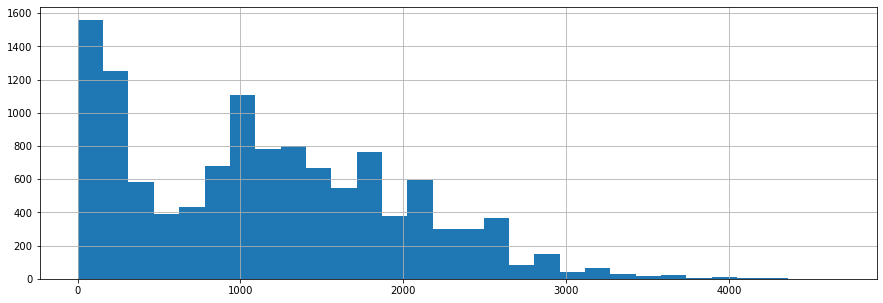

In [20]:
# Histogram showing the distribution of days
data_df["time_since_first_review"].hist(bins=30, figsize=(15,5))

In [21]:
# Create a function for binning
def binning_review_time(col, bins, labels):
    data_df[col]=pd.cut(data_df[col], bins=bins, labels=labels, include_lowest= True)
    data_df[col]=data_df[col].astype('str')

In [22]:
#Binning the time since first review
binning_review_time("time_since_first_review",
                   bins=[0, 180, 365, 730, 1460, max(data_df.time_since_first_review)],
                   labels=["0-6 months", "6-12 months", "1-2 years","2-4 years", "4+years"])


In [23]:
#Show value count for the column
data_df["time_since_first_review"].replace({"nan": "no reviews"}, inplace=True)
data_df["time_since_first_review"].value_counts()

4+years        4049
2-4 years      3758
no reviews     3223
0-6 months     1786
6-12 months    1265
1-2 years      1090
Name: time_since_first_review, dtype: int64

C:\Users\carol\.conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


<AxesSubplot:>

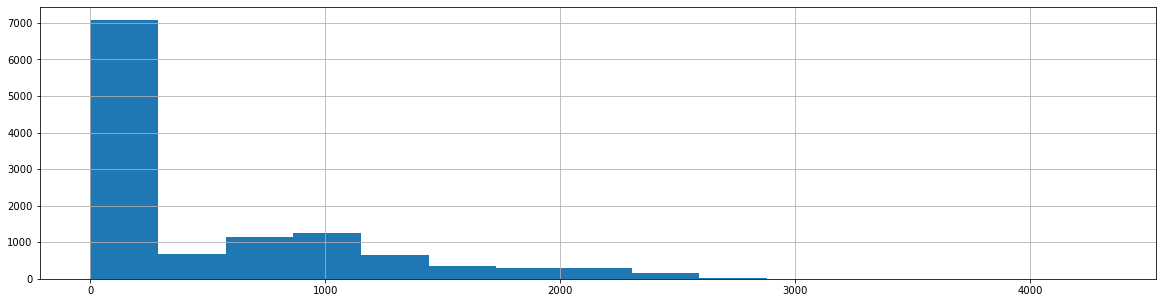

In [24]:
# Convert last review column to datetime to extract the number of days since first review
data_df["last_review"]=pd.to_datetime(data_df["last_review"])

# Calculate the number of days since first review and date compilation
data_df["time_since_last_review"]=(pd.datetime(2022,6,6) - data_df["last_review"]).astype('timedelta64[D]')

# Histogram showing the distribution of days
data_df["time_since_last_review"].hist(bins=15, figsize=(20,5))


In [25]:
#Binning the time since first review
binning_review_time("time_since_last_review",
                   bins=[0, 30, 90, 180, 365, max(data_df["time_since_last_review"])],
                   labels=["within 1 month", "1-3 months", "3-6 months","6-12 months","1+ years"])


In [26]:
#Show value count for the column
data_df["time_since_last_review"].replace({"nan": "no reviews"}, inplace=True)
data_df["time_since_last_review"].value_counts()

1+ years          4672
within 1 month    3839
no reviews        3223
1-3 months        1620
3-6 months         964
6-12 months        853
Name: time_since_last_review, dtype: int64

In [27]:
data_df.head()

,id,name,host_since,host_response_time,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,hot_tub_sauna_or_pool,room_features,other_facilities,private_entrance,parking,kitchen,elevator,gym,time_since_first_review,time_since_last_review
0,1419,Beautiful home in amazing area!,2008-08-08,unknown,f,1.0,t,Little Portugal,43.64590,-79.42423,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4+years,1+ years
1,8077,Downtown Harbourfront Private Room,2009-06-22,unknown,f,2.0,f,Waterfront Communities-The Island,43.64080,-79.37673,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4+years,1+ years
2,27423,Executive Studio Unit- Ideal for One Person,2010-05-04,within a few hours,f,1.0,t,South Riverdale,43.66884,-79.32725,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,4+years,1+ years
3,30931,Downtown Toronto - Waterview Condo,2009-06-22,unknown,f,2.0,f,Waterfront Communities-The Island,43.64015,-79.37625,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,4+years,1+ years
4,40456,Downtown- King Size Bed and Parking,2010-07-20,within an hour,t,3.0,t,South Parkdale,43.63539,-79.44010,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,4+years,3-6 months


### review rating columns

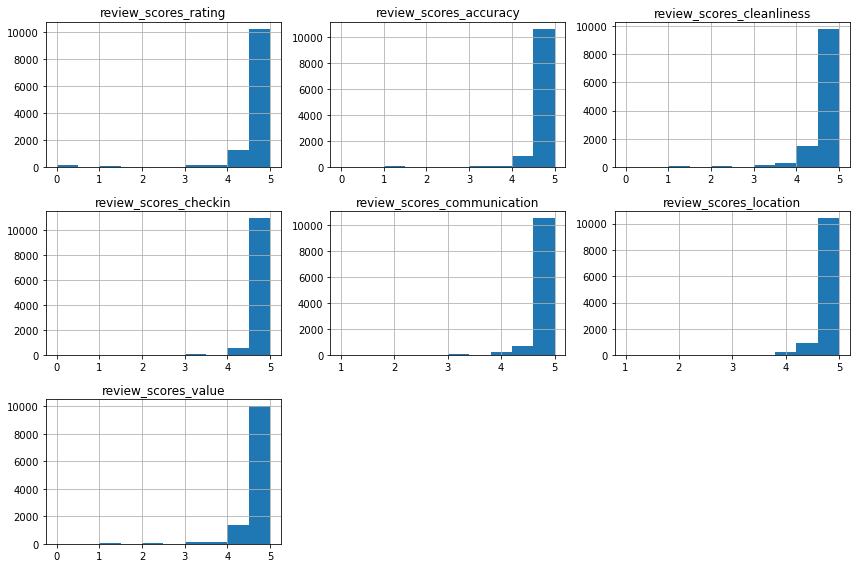

In [28]:
# Checking the distributions of the review ratings columns
plotted_variables = list(data_df.columns[data_df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(plotted_variables):
    ax = fig.add_subplot(3,3,i+1)
    data_df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [29]:
# Fill null values for multiple columns with No Rating
cols=["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness","review_scores_checkin", "review_scores_communication",
                "review_scores_location","review_scores_value"]
# data_df[cols]=data_df[cols].apply(pd.to_numeric, errors="coerce", axis=1)
data_df[cols]=data_df[cols].fillna("no rating")

In [30]:
#Drop additional columns and null values
data_df.drop(columns=["first_review", "last_review"],inplace=True)
data_df.dropna(how='any', inplace=True)

In [31]:
data_df.isnull().sum()

id                             0
name                           0
host_since                     0
host_response_time             0
host_is_superhost              0
host_listings_count            0
host_identity_verified         0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
availability_90                0
number_of_reviews              0
number_of_reviews_ltm          0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
host_active_days               0
host_respo

### Checking and Removing Outliers from data

In [32]:
data_df[["price","minimum_nights","maximum_nights","availability_90","host_listings_count"]].describe()

,price,minimum_nights,maximum_nights,availability_90,host_listings_count
count,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000
mean,178.591323,25.608862,656.744494,27.269880,7.203481
std,316.200380,43.301700,494.781618,30.777451,30.171094
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,75.000000,3.000000,90.000000,0.000000,1.000000
50%,120.000000,28.000000,1000.000000,14.000000,1.000000
75%,200.000000,28.000000,1125.000000,52.000000,4.000000
max,13000.000000,1125.000000,10001.000000,90.000000,411.000000


#### According to the AirBnB dataset

- 75% of the values under variable "price" is around 200 dollars, yet the maximum price is 13,000 dollars.
- 75% of the values under variable "minimum_nights" is around 28, yet the max shows 1125 nights.
- 75% of the values under variable "host_listings_count" is under 4, yet the max value is 411.


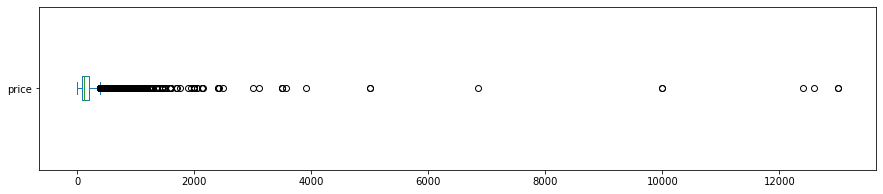

price : values over 1000
125 entries
0.8242%


In [33]:
# Check the price column for outliers
data_df.price.plot(kind="box", vert=False, figsize=(15,3))
plt.show()

#Checking the quantity of values over 1500 in the price column
print("price : values over 1000")
print("{} entries".format(len(data_df[data_df.price>1000])))
print("{:.4f}%".format((len(data_df[data_df.price>1000])/data_df.shape[0])*100))

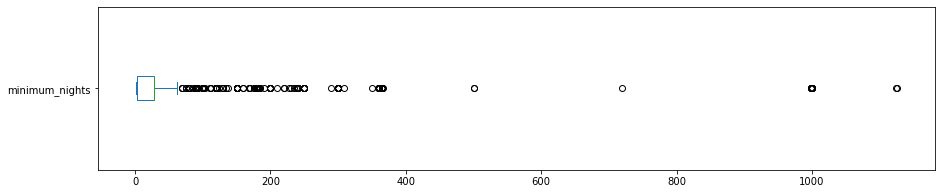

minimum_nights : over 30 nights
744 entries
4.9057%


In [34]:
# Check the minimum_nights column for outliers
data_df.minimum_nights.plot(kind="box", vert=False, figsize=(15,3))
plt.show()

#Checking the quantity of minimum_nights over 30
print("minimum_nights : over 30 nights")
print("{} entries".format(len(data_df[data_df.minimum_nights>30])))
print("{:.4f}%".format((len(data_df[data_df.minimum_nights>30])/data_df.shape[0])*100))

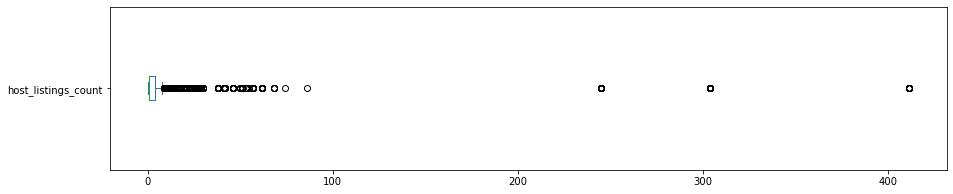

Host Listings Count : values over 50
291 entries
1.9188%


In [35]:
# Check the host_listings_count column for outliers
data_df.host_listings_count.plot(kind="box", vert=False, figsize=(15,3))
plt.show()

#Checking the quantity of values over 50 in the host listings count column
print("Host Listings Count : values over 50")
print("{} entries".format(len(data_df[data_df.host_listings_count>50])))
print("{:.4f}%".format((len(data_df[data_df.host_listings_count>50])/data_df.shape[0])*100))

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>],
       [<AxesSubplot:title={'center':'maximum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_90'}>]], dtype=object)

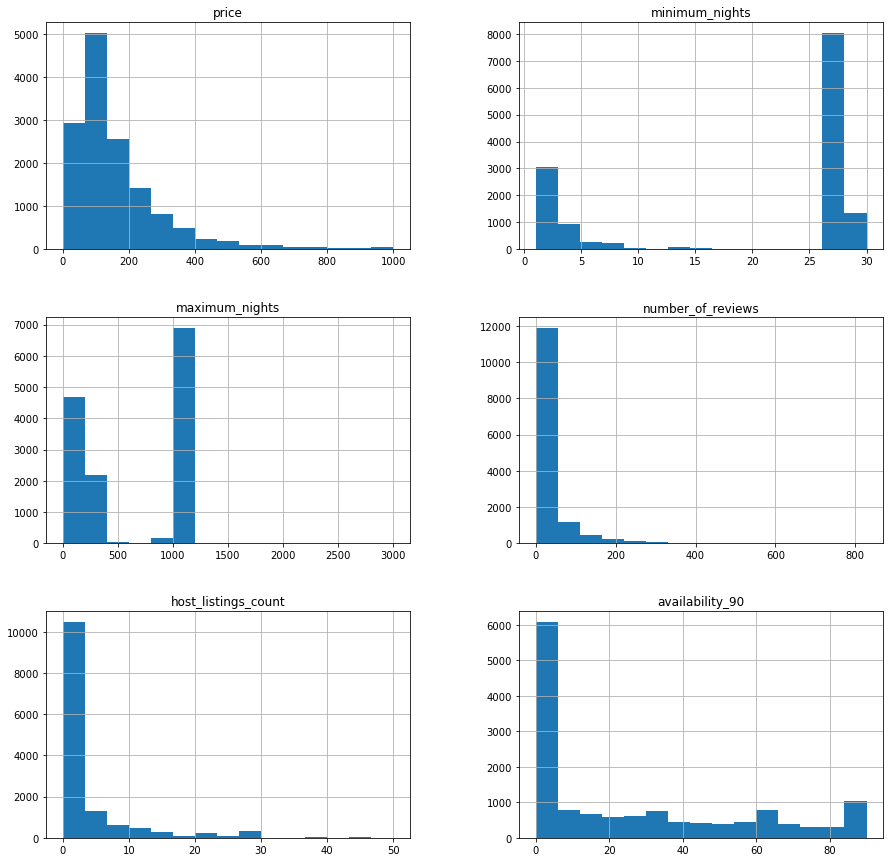

In [36]:
# Create a clean dataframe without the outliers

clean_data_df=data_df.copy()
clean_data_df.drop(clean_data_df[clean_data_df.price>1000].index, axis=0, inplace=True)
clean_data_df.drop(clean_data_df[clean_data_df.price>1000].index, axis=0, inplace=True)
clean_data_df.drop(clean_data_df[clean_data_df.minimum_nights>30].index, axis=0, inplace=True)
clean_data_df.drop(clean_data_df[clean_data_df.host_listings_count>50].index, axis=0, inplace=True)

# Show clean data with histogram
clean_data_df[["price", "minimum_nights","maximum_nights", "number_of_reviews", "host_listings_count", "availability_90",]].hist(bins=15, figsize=(15,15))

In [37]:
clean_data_df.shape

(14016, 52)

In [38]:
clean_data_df.head()

,id,name,host_since,host_response_time,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,hot_tub_sauna_or_pool,room_features,other_facilities,private_entrance,parking,kitchen,elevator,gym,time_since_first_review,time_since_last_review
0,1419,Beautiful home in amazing area!,2008-08-08,unknown,f,1.0,t,Little Portugal,43.64590,-79.42423,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4+years,1+ years
4,40456,Downtown- King Size Bed and Parking,2010-07-20,within an hour,t,3.0,t,South Parkdale,43.63539,-79.44010,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,4+years,3-6 months
6,43964,Entire 2-bedrm basement private entry free par...,2010-08-05,within an hour,f,1.0,t,Wexford/Maryvale,43.74922,-79.29188,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,4+years,within 1 month
7,573892,DOWNTOWN TORONTO LUXURY FURNISHED CORPORATE SUITE,2012-04-19,within an hour,f,6.0,t,Waterfront Communities-The Island,43.64278,-79.37985,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,4+years,1-3 months
8,579918,Luxury Queen West Private Loft,2011-09-14,unknown,f,1.0,t,Niagara,43.63987,-79.42034,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,4+years,1+ years


In [39]:
clean_data_df.columns

Index(['id', 'name', 'host_since', 'host_response_time', 'host_is_superhost',
       'host_listings_count', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_90',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'host_active_days', 'host_response_rate_new', 'toiletries',
       'high_end_electronics', 'ac_heater', 'internet', 'bbq',
       'home_appliances', 'coffee_machine', 'long_term_stays', 'host_greeting',
       'safety', 'outdoor_space', 'hot_tub_sauna_or_pool', 'room_features',
       'other_facilities', 'private_entrance', 'parking', 'kitchen',
       'elevator', 'gym', 'time